## Time-series Analysis & Stationarity Check

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from pylab import rcParams
from IPython.display import display
import math

import warnings
from statsmodels.tools.sm_exceptions import InterpolationWarning
warnings.simplefilter("ignore", category=InterpolationWarning)


#### Data preparation

In [3]:
df = pd.read_excel("Данные-рус Обработанные.xlsx")
df.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Показатель,Категория хозяйства,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
3,КРС,Сельхозпредприятия,РЕСПУБЛИКА КАЗАХСТАН,3400.96,3685.9,4154.43,5203.94,5084.05,6718.83,4235.03,...,9703.45,11165.56,8179.14,24407.52,9835.22,11955.41,16955.56,10638.42,9612.92,21521.5
4,КРС,Сельхозпредприятия,АКМОЛИНСКАЯ ОБЛАСТЬ,514.75,497.95,863.93,667.81,633.39,600.86,875.47,...,978.41,1071.35,1067.76,1119.61,898.07,1382,1133.36,1073.27,1118.19,1332.88


In [4]:
# remove first two rows (blank)
df = df.drop(index=df.index[:2]).reset_index(drop=True)
df.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122
0,Показатель,Категория хозяйства,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
1,КРС,Сельхозпредприятия,РЕСПУБЛИКА КАЗАХСТАН,3400.96,3685.9,4154.43,5203.94,5084.05,6718.83,4235.03,...,9703.45,11165.56,8179.14,24407.52,9835.22,11955.41,16955.56,10638.42,9612.92,21521.5
2,КРС,Сельхозпредприятия,АКМОЛИНСКАЯ ОБЛАСТЬ,514.75,497.95,863.93,667.81,633.39,600.86,875.47,...,978.41,1071.35,1067.76,1119.61,898.07,1382,1133.36,1073.27,1118.19,1332.88
3,КРС,Сельхозпредприятия,АКТЮБИНСКАЯ ОБЛАСТЬ,554.41,504.35,493.56,445.51,585.79,316.47,469.49,...,1520.51,1747.09,915.8,1851.96,932.63,945.11,1142.92,1637.64,1180.54,1045.69
4,КРС,Сельхозпредприятия,АЛМАТИНСКАЯ ОБЛАСТЬ,178.3,362.86,352.49,451.79,228.32,708.84,280.55,...,1055.43,110.45,188.15,172.63,112.31,134.99,1212.02,260.02,129.38,159.66


In [5]:
# Set the first row as column labels
df.columns = df.iloc[0]  # Assign first row as header
df = df[1:].reset_index(drop=True)  # Drop the first row and reset index
df.sample(5)


,Показатель,Категория хозяйства,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
326,Верблюды,Хозяйства населения,ТУРКЕСТАНСКАЯ ОБЛАСТЬ,нет,нет,нет,нет,нет,нет,нет,...,66,73,85.5,65.4,16.3,93.5,84.3,88.8,185.8,306.4
50,КРС,Хозяйства населения,ЖАМБЫЛСКАЯ ОБЛАСТЬ,2091.25,2262.1,1859.7,2448.13,2208.03,3262.85,2006.73,...,1725.9,2208.7,1917.5,2946.8,1834.6,3439.9,2926.8,2212.7,3720.6,10471.3
45,КРС,Хозяйства населения,АКМОЛИНСКАЯ ОБЛАСТЬ,3774.28,2978.82,3213.44,3029.94,3056.77,3181.92,1204.76,...,2459.1,2329.1,2218.5,2369.9,901.9,817.5,1362.6,1204.4,1971.4,2096.6
52,КРС,Хозяйства населения,КОСТАНАЙСКАЯ ОБЛАСТЬ,2936.46,4750.22,3175.99,2922.4,4938.1,3708.7,506.66,...,1838.3,1648.4,2773.4,2006.5,264.1,1449.6,2198.8,459.7,271.1,751.4
335,Птицы,Сельхозпредприятия,ЗАПАДНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ,60.04,55.92,7.61,8.16,37.98,29.74,20.6,...,813.93,1172.08,1133.85,887.13,1125.8,1029.6,941.53,1031.99,1191.95,955.53


In [6]:
df["Регион"].unique()

array(['РЕСПУБЛИКА КАЗАХСТАН', '    АКМОЛИНСКАЯ ОБЛАСТЬ',
       '    АКТЮБИНСКАЯ ОБЛАСТЬ', '    АЛМАТИНСКАЯ ОБЛАСТЬ',
       '    АТЫРАУСКАЯ ОБЛАСТЬ', '    ЗАПАДНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ',
       '    ЖАМБЫЛСКАЯ ОБЛАСТЬ', '    КАРАГАНДИНСКАЯ ОБЛАСТЬ',
       '    КОСТАНАЙСКАЯ ОБЛАСТЬ', '    КЫЗЫЛОРДИНСКАЯ ОБЛАСТЬ',
       '    МАНГИСТАУСКАЯ ОБЛАСТЬ', '    ЮЖНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ',
       '    ПАВЛОДАРСКАЯ ОБЛАСТЬ', '    СЕВЕРО0КАЗАХСТАНСКАЯ ОБЛАСТЬ',
       '    ВОСТОЧНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ', '    ГАСТАНА', '    ГАЛМАТЫ',
       '    ГШЫМКЕНТ', '    ТУРКЕСТАНСКАЯ ОБЛАСТЬ', '    ОБЛАСТЬ ЖЕТІСУ',
       '    ОБЛАСТЬ ҰЛЫТАУ', '    ОБЛАСТЬ АБАЙ'], dtype=object)

In [7]:
df["Регион"] = df["Регион"].str.strip()
rename_dict = {
    "ВОСТОЧНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ": "ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ", 
    "ГАЛМАТЫ": "ГОРОД АЛМАТЫ",
    "ГАСТАНА": "ГОРОД АСТАНА",
    "ГШЫМКЕНТ": "ГОРОД ШЫМКЕНТ",  
    "ЗАПАДНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ": "ЗАПАДНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ",
    "СЕВЕРО0КАЗАХСТАНСКАЯ ОБЛАСТЬ": "СЕВЕРО-КАЗАХСТАНСКАЯ ОБЛАСТЬ",
    "ЮЖНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ": "ЮЖНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ",  
}

# Rename regions in the index
df["Регион"] = df["Регион"].replace(rename_dict)

df["Регион"].unique()

array(['РЕСПУБЛИКА КАЗАХСТАН', 'АКМОЛИНСКАЯ ОБЛАСТЬ',
       'АКТЮБИНСКАЯ ОБЛАСТЬ', 'АЛМАТИНСКАЯ ОБЛАСТЬ', 'АТЫРАУСКАЯ ОБЛАСТЬ',
       'ЗАПАДНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ', 'ЖАМБЫЛСКАЯ ОБЛАСТЬ',
       'КАРАГАНДИНСКАЯ ОБЛАСТЬ', 'КОСТАНАЙСКАЯ ОБЛАСТЬ',
       'КЫЗЫЛОРДИНСКАЯ ОБЛАСТЬ', 'МАНГИСТАУСКАЯ ОБЛАСТЬ',
       'ЮЖНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ', 'ПАВЛОДАРСКАЯ ОБЛАСТЬ',
       'СЕВЕРО-КАЗАХСТАНСКАЯ ОБЛАСТЬ', 'ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ',
       'ГОРОД АСТАНА', 'ГОРОД АЛМАТЫ', 'ГОРОД ШЫМКЕНТ',
       'ТУРКЕСТАНСКАЯ ОБЛАСТЬ', 'ОБЛАСТЬ ЖЕТІСУ', 'ОБЛАСТЬ ҰЛЫТАУ',
       'ОБЛАСТЬ АБАЙ'], dtype=object)

In [8]:
# Filter the df
df = df[df['Показатель'] == "Яйца"]
# df = df.drop(columns=["Показатель", "Категория хозяйства"])
df.sample(5)

,Показатель,Категория хозяйства,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
481,Яйца,Сельхозпредприятия,ОБЛАСТЬ ЖЕТІСУ,нет,нет,нет,нет,нет,нет,нет,...,21036,20942,22453,19459,19627,20918,23692,23200,23938,23399
464,Яйца,Сельхозпредприятия,АКТЮБИНСКАЯ ОБЛАСТЬ,6695,7071,8781,9098,8337,7417,7417,...,11961,11643,12949,13687,14249,13469,13138,14051,14675,15865
498,Яйца,Крестьянские или фермерские хозяйства,ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,34.1,57.4,72,94.9,127.9,114.9,114.9,...,17.9,12.6,16.8,47.5,23.9,22.4,19.1,17.6,17.7,26.4
514,Яйца,Хозяйства населения,КОСТАНАЙСКАЯ ОБЛАСТЬ,6584.2,4951.8,30161.3,26654.3,26864,23750,23750,...,3712.5,3256.8,2655.6,3588.1,3416.4,3372.3,2504,567.7,2255.5,1863.3
519,Яйца,Хозяйства населения,СЕВЕРО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,3860.1,3860.1,5079.2,17776.8,32720.9,41517.9,41517.9,...,1746.7,5405.5,6901,12032.1,13213,9138.8,5754.4,1381.7,1626.2,1495


In [9]:
# Считаем количество всех ячеек каждого типа
# print(df[(df["Категория хозяйства"] == "Крестьянские или фермерские хозяйства") & (df["Регион"] == "ГОРОД АЛМАТЫ")].applymap(type).stack().value_counts())


In [10]:
# Sum only the last two columns, grouped by "Регион"
df_sum = df.groupby("Регион")[df.columns[3:]].sum().reset_index()
df_sum


,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,2015-08-01 00:00:00,2015-09-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
0,АКМОЛИНСКАЯ ОБЛАСТЬ,51667.7,49357.2,59105.8,61953.7,72700.2,71629.5,71629.5,67269.6,65812.8,...,64167.2,59663.6,60711.6,60767.6,64270.3,62899.9,58300.1,56071.5,52213.7,55640.3
1,АКТЮБИНСКАЯ ОБЛАСТЬ,12433.9,11404.2,13962.1,14037.1,16327.4,14878.5,14878.5,15403.8,17049.6,...,15908.4,15198.5,16896.0,19630.8,20242.2,17751.9,19636.9,18993.4,19062.1,18775.5
2,АЛМАТИНСКАЯ ОБЛАСТЬ,77166.7,68749.0,80477.6,85247.6,100331.2,90077.7,90077.7,95344.9,97860.2,...,45004.5,41819.3,42903.3,44604.4,38668.6,43050.1,46554.1,49803.9,51729.5,47398.6
3,АТЫРАУСКАЯ ОБЛАСТЬ,2611.1,2646.8,2663.6,2912.5,4336.2,5047.9,5047.9,5694.4,6106.1,...,1784.4,105.7,170.6,183.7,234.9,128.4,139.0,104.5,84.6,66.3
4,ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,6106.2,7131.1,10886.9,11777.5,18897.3,15488.8,15488.8,15028.2,13342.8,...,4495.1,5347.9,6670.2,7405.6,6088.3,5916.0,5600.6,4681.3,4394.2,4553.1
5,ГОРОД АЛМАТЫ,154.1,35.5,27.6,27.6,29.4,24.5,24.5,25.3,24,...,16.6,16.2,16.1,15.8,15.8,15.7,15.5,15.1,15,15.1
6,ГОРОД АСТАНА,8.5,9.1,11.3,31.3,18.6,16.7,16.7,15.8,10.2,...,0.2,0.2,0.2,0.2,0.2,0.1,0.1,0.1,0.1,0.1
7,ГОРОД ШЫМКЕНТ,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,...,13738.5,13958.4,15634.1,14532.9,13793.4,14567.7,14597.2,15961.0,17495.6,17266.1
8,ЖАМБЫЛСКАЯ ОБЛАСТЬ,6679.3,5882.9,8486.3,9293.0,12289.6,15259.7,15259.7,14694.2,11595.2,...,7596.5,8548.5,11266.8,14618.4,18504.3,14534.9,11659.5,8246.6,7127.0,7000.5
9,ЗАПАДНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,10279.2,10693.9,11749.1,13940.3,16197.7,13019.2,13019.2,11795.4,11780.8,...,12963.7,12617.3,12366.7,13068.2,11662.0,12949.8,13164.9,10955.9,11636.6,10530.0


In [11]:
# convert date columns to datetime format
df_sum.columns = list(df_sum.columns[:1]) + list(pd.to_datetime(df_sum.columns[-120:]))
df_sum = df_sum.rename(columns={col: col.strftime("%Y-%m-%d") for col in df_sum.columns[-120:]})
df_sum.sample(5)


,Регион,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,...,2024-03-01,2024-04-01,2024-05-01,2024-06-01,2024-07-01,2024-08-01,2024-09-01,2024-10-01,2024-11-01,2024-12-01
20,ТУРКЕСТАНСКАЯ ОБЛАСТЬ,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,...,21360.2,24469.7,23754.2,22349.7,22437.4,23808.0,22847.1,21639.9,19659.4,19576.8
0,АКМОЛИНСКАЯ ОБЛАСТЬ,51667.7,49357.2,59105.8,61953.7,72700.2,71629.5,71629.5,67269.6,65812.8,...,64167.2,59663.6,60711.6,60767.6,64270.3,62899.9,58300.1,56071.5,52213.7,55640.3
5,ГОРОД АЛМАТЫ,154.1,35.5,27.6,27.6,29.4,24.5,24.5,25.3,24,...,16.6,16.2,16.1,15.8,15.8,15.7,15.5,15.1,15,15.1
17,ПАВЛОДАРСКАЯ ОБЛАСТЬ,9637.3,8361.4,9164.5,10447.6,14083.6,14200.2,14200.2,12827.6,15190.3,...,16631.1,16747.1,17414.0,18832.4,18654.7,18689.8,18071.9,16535.5,15899.2,14834.9
6,ГОРОД АСТАНА,8.5,9.1,11.3,31.3,18.6,16.7,16.7,15.8,10.2,...,0.2,0.2,0.2,0.2,0.2,0.1,0.1,0.1,0.1,0.1


C:\Users\Acer\AppData\Local\Temp\ipykernel_19992\2851252397.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_sum.replace("нетнетнет", np.nan, inplace=True)


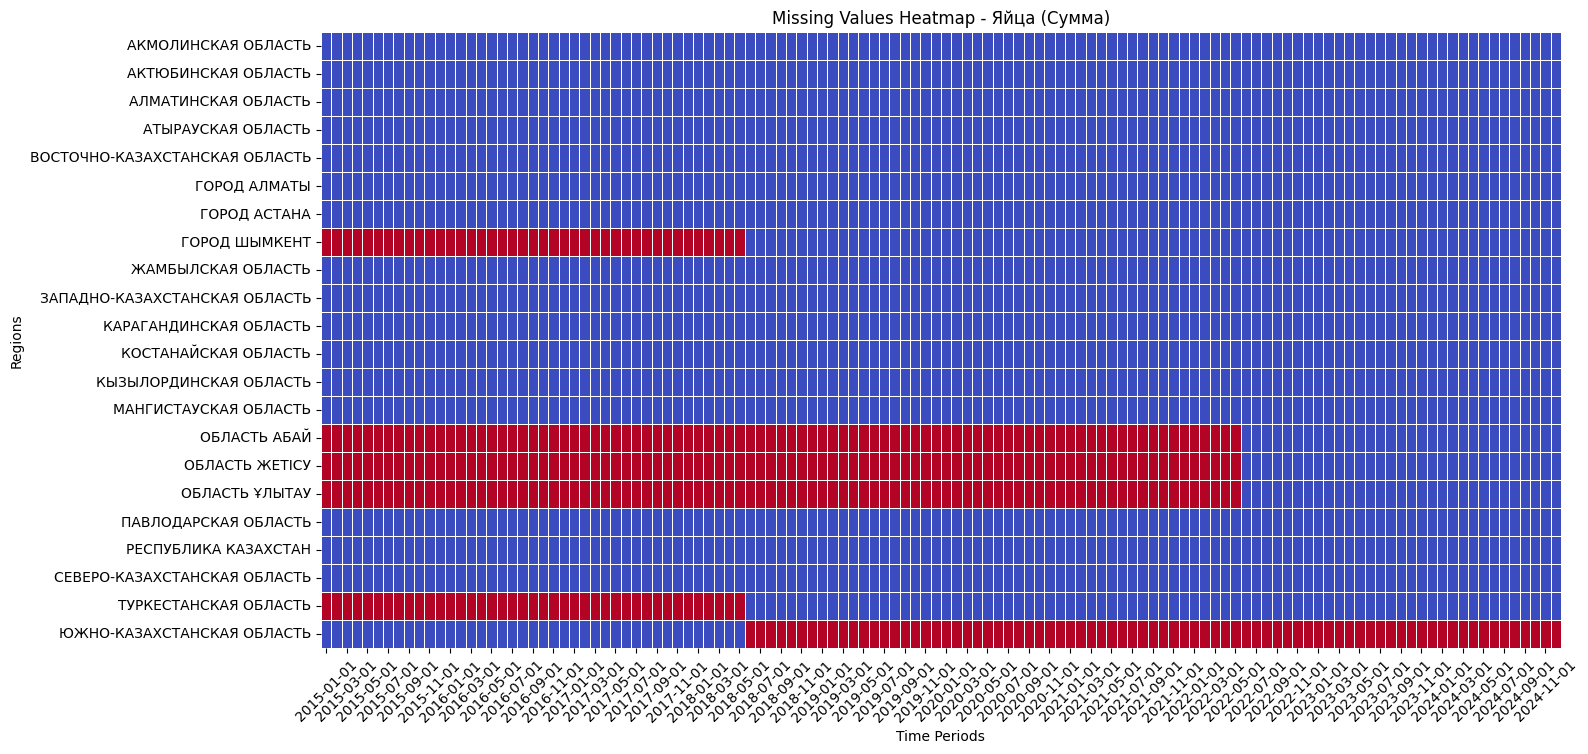

In [12]:
# Replace "нетнетнет" with NaN for easier handling
df_sum.replace("нетнетнет", np.nan, inplace=True)

# Convert all values to numeric, keeping NaNs
df_sum_numeric = df_sum.set_index("Регион").apply(pd.to_numeric, errors="coerce")

# Create heatmap: 1 for missing values, 0 for present values
missing_heatmap = df_sum_numeric.isna()

# Plot heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(missing_heatmap, cmap="coolwarm", cbar=False, linewidths=0.5)
plt.title('Missing Values Heatmap - Яйца (Сумма)')
plt.xlabel("Time Periods")
plt.ylabel("Regions")
plt.xticks(rotation=45)
plt.show()

In [13]:
# Convert from wide format to long format
df_sum_melted = df_sum.melt(id_vars=["Регион"], var_name="Месяц", value_name="Объем")
df_sum_melted.sample(5)

,Регион,Месяц,Объем
873,ОБЛАСТЬ ЖЕТІСУ,2018-04-01,NaN
2153,СЕВЕРО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,2023-02-01,39820.4
855,СЕВЕРО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,2018-03-01,54499.7
2477,МАНГИСТАУСКАЯ ОБЛАСТЬ,2024-05-01,57.6
634,РЕСПУБЛИКА КАЗАХСТАН,2017-05-01,436228.9


In [14]:
# Convert date column to datetime
df_sum_melted["Месяц"] = pd.to_datetime(df_sum_melted["Месяц"])

# Set index for time-series analysis
df_sum_melted = df_sum_melted.sort_values(["Регион", "Месяц"]).set_index(["Регион", "Месяц"])

df_sum_melted

Объем
Регион                     Месяц              
АКМОЛИНСКАЯ ОБЛАСТЬ        2015-01-01  51667.7
                           2015-02-01  49357.2
                           2015-03-01  59105.8
                           2015-04-01  61953.7
                           2015-05-01  72700.2
...                                        ...
ЮЖНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ 2024-08-01      NaN
                           2024-09-01      NaN
                           2024-10-01      NaN
                           2024-11-01      NaN
                           2024-12-01      NaN

[2640 rows x 1 columns]

In [15]:
# Replace "нет" with NaN
df_sum_melted = df_sum_melted.replace("нетнетнет", np.nan)
df_sum_melted.isna().groupby("Регион").mean() * 100

,Объем
Регион,
АКМОЛИНСКАЯ ОБЛАСТЬ,0.000000
АКТЮБИНСКАЯ ОБЛАСТЬ,0.000000
АЛМАТИНСКАЯ ОБЛАСТЬ,0.000000
АТЫРАУСКАЯ ОБЛАСТЬ,0.000000
ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,0.000000
ГОРОД АЛМАТЫ,0.000000
ГОРОД АСТАНА,0.000000
ГОРОД ШЫМКЕНТ,34.166667
ЖАМБЫЛСКАЯ ОБЛАСТЬ,0.000000


In [16]:
# Filter the df
df_shp = df[(df['Показатель'] == "Яйца") & (df['Категория хозяйства'] == "Сельхозпредприятия")]
df_shp = df_shp.drop(columns=["Показатель", "Категория хозяйства"])
df_shp = df_shp.sort_values(by="Регион", ascending=True)

df_shp.sample(5)


,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,2015-08-01 00:00:00,2015-09-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
483,ОБЛАСТЬ АБАЙ,нет,нет,нет,нет,нет,нет,нет,нет,нет,...,0,0,0,0,0,0,0,0,0,0
479,ГОРОД ШЫМКЕНТ,нет,нет,нет,нет,нет,нет,нет,нет,нет,...,13355,13494.5,14993.2,13848.6,13140.6,14050.9,14273.7,15679.4,17224,16995.5
469,КАРАГАНДИНСКАЯ ОБЛАСТЬ,51287.6,46206.7,49943.9,48722.4,48285.8,47499.5,47499.5,44564.4,43942.7,...,55062.1,50446.4,50268,48732.7,49474.6,50665,46066.8,46278.5,45195.8,47464.8
476,ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,1822,1880.6,2338.7,1881.4,2293.3,2098.7,2098.7,2197.1,2290.1,...,588,615,432,151.9,245,418,295,422,400,416
468,ЖАМБЫЛСКАЯ ОБЛАСТЬ,3429.6,3084.3,3628.4,3654.1,3290.4,3377.4,3377.4,3262.5,3205.7,...,3031,3122,5632,5894,7156,3038,3087,3154,2895,1987


C:\Users\Acer\AppData\Local\Temp\ipykernel_19992\3127340524.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_shp.replace("нет", np.nan, inplace=True)


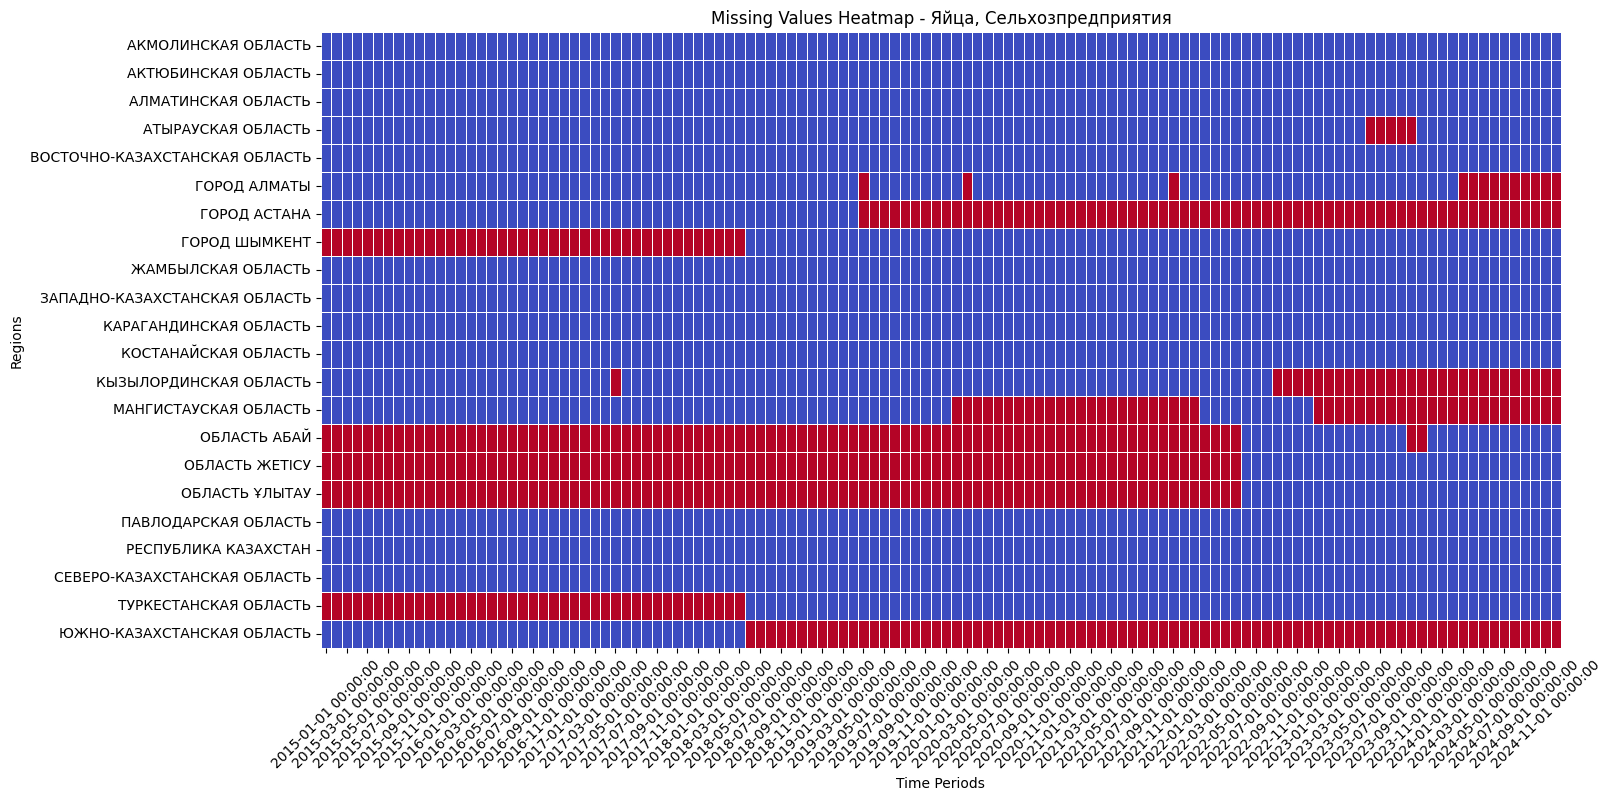

In [17]:
# Replace "нетнетнет" with NaN for easier handling
df_shp.replace("нет", np.nan, inplace=True)

# Convert all values to numeric, keeping NaNs
df_shp_numeric = df_shp.set_index("Регион").apply(pd.to_numeric, errors="coerce")

# Create heatmap: 1 for missing values, 0 for present values
missing_heatmap = df_shp_numeric.isna()

# Plot heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(missing_heatmap, cmap="coolwarm", cbar=False, linewidths=0.5)
plt.title('Missing Values Heatmap - Яйца, Сельхозпредприятия')
plt.xlabel("Time Periods")
plt.ylabel("Regions")
plt.xticks(rotation=45)
plt.show()

In [18]:
# Filter the df
df_kfh = df[(df['Показатель'] == "Яйца") & (df['Категория хозяйства'] == "Крестьянские или фермерские хозяйства")]
df_kfh = df_kfh.drop(columns=["Показатель", "Категория хозяйства"])
df_kfh = df_kfh.sort_values(by="Регион", ascending=True)

df_kfh.sample(5)

,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,2015-08-01 00:00:00,2015-09-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
486,АКТЮБИНСКАЯ ОБЛАСТЬ,14.6,9.6,11.6,12.8,24.9,43.7,43.7,24.3,16.3,...,60,90,130.6,112.2,104.9,103.8,88.1,68.6,54.2,71.4
484,РЕСПУБЛИКА КАЗАХСТАН,1055,919.3,1307.1,1755,2155.8,2674.8,2674.8,2453.7,2168.1,...,1418.7,1640.2,2015.6,3557.3,1781.2,1538.1,3003.1,1733.1,1479.2,1789.4
495,ЮЖНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,81,91.8,147.7,147.9,170.6,171.9,171.9,175,133.7,...,нет,нет,нет,нет,нет,нет,нет,нет,нет,нет
485,АКМОЛИНСКАЯ ОБЛАСТЬ,3,3.5,5.6,6.3,7.2,9,9,9,8.4,...,103.1,117.7,122.8,124.2,7.4,7.5,5.5,2.7,0.9,1.9
498,ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,34.1,57.4,72,94.9,127.9,114.9,114.9,117,85.3,...,17.9,12.6,16.8,47.5,23.9,22.4,19.1,17.6,17.7,26.4


C:\Users\Acer\AppData\Local\Temp\ipykernel_19992\3276233553.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_kfh.replace("нет", np.nan, inplace=True)


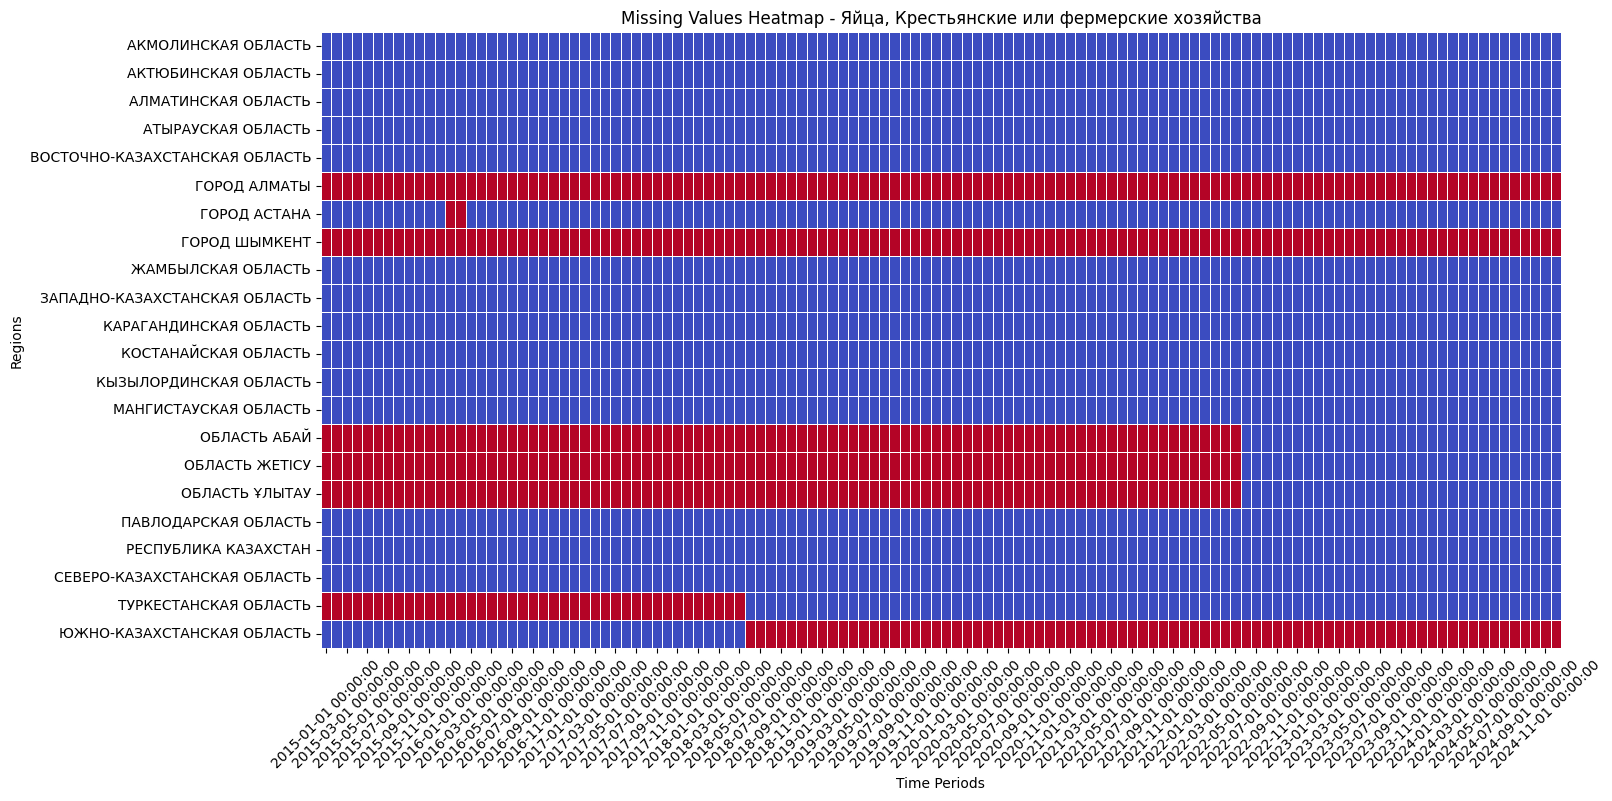

In [19]:
# Replace "нетнетнет" with NaN for easier handling
df_kfh.replace("нет", np.nan, inplace=True)

# Convert all values to numeric, keeping NaNs
df_kfh_numeric = df_kfh.set_index("Регион").apply(pd.to_numeric, errors="coerce")

# Create heatmap: 1 for missing values, 0 for present values
missing_heatmap = df_kfh_numeric.isna()

# Plot heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(missing_heatmap, cmap="coolwarm", cbar=False, linewidths=0.5)
plt.title('Missing Values Heatmap - Яйца, Крестьянские или фермерские хозяйства')
plt.xlabel("Time Periods")
plt.ylabel("Regions")
plt.xticks(rotation=45)
plt.show()

In [20]:
# Filter the df
df_hn = df[(df['Показатель'] == "Яйца") & (df['Категория хозяйства'] == "Хозяйства населения")]
df_hn = df_hn.drop(columns=["Показатель", "Категория хозяйства"])
df_hn = df_hn.sort_values(by="Регион", ascending=True)

df_hn.sample(5)

,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,2015-08-01 00:00:00,2015-09-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
525,ОБЛАСТЬ ЖЕТІСУ,нет,нет,нет,нет,нет,нет,нет,нет,нет,...,5840.9,5150.3,6536.1,8966.5,6292.9,6126.8,5591.8,5765.9,2972.7,3960
515,КЫЗЫЛОРДИНСКАЯ ОБЛАСТЬ,197,226.6,230.7,425.7,516.1,597.9,597.9,605.1,678.4,...,324.6,583.2,619.2,811.9,790.8,779.2,857,742.5,666.1,639.8
527,ОБЛАСТЬ АБАЙ,нет,нет,нет,нет,нет,нет,нет,нет,нет,...,4220.8,4580.6,6461.9,6548.2,6662.1,5568.4,5086.8,3765.6,2865.8,3276.1
506,РЕСПУБЛИКА КАЗАХСТАН,49281.9,47440.1,95545.4,109694.4,163593.5,159493.9,159493.9,137708.4,108951.8,...,50383.9,59792.2,72390.7,93601.4,89681.5,77493.7,66982,46729.6,39443.6,41310.7
507,АКМОЛИНСКАЯ ОБЛАСТЬ,2497.7,2864.7,4328.7,7095.8,12913.8,12846.4,12846.4,9810.5,7746.8,...,3720.8,6071.6,9586.9,10791.9,10846.7,8362,6405.1,4871.5,3139,3125.4


C:\Users\Acer\AppData\Local\Temp\ipykernel_19992\375413994.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_hn.replace("нет", np.nan, inplace=True)


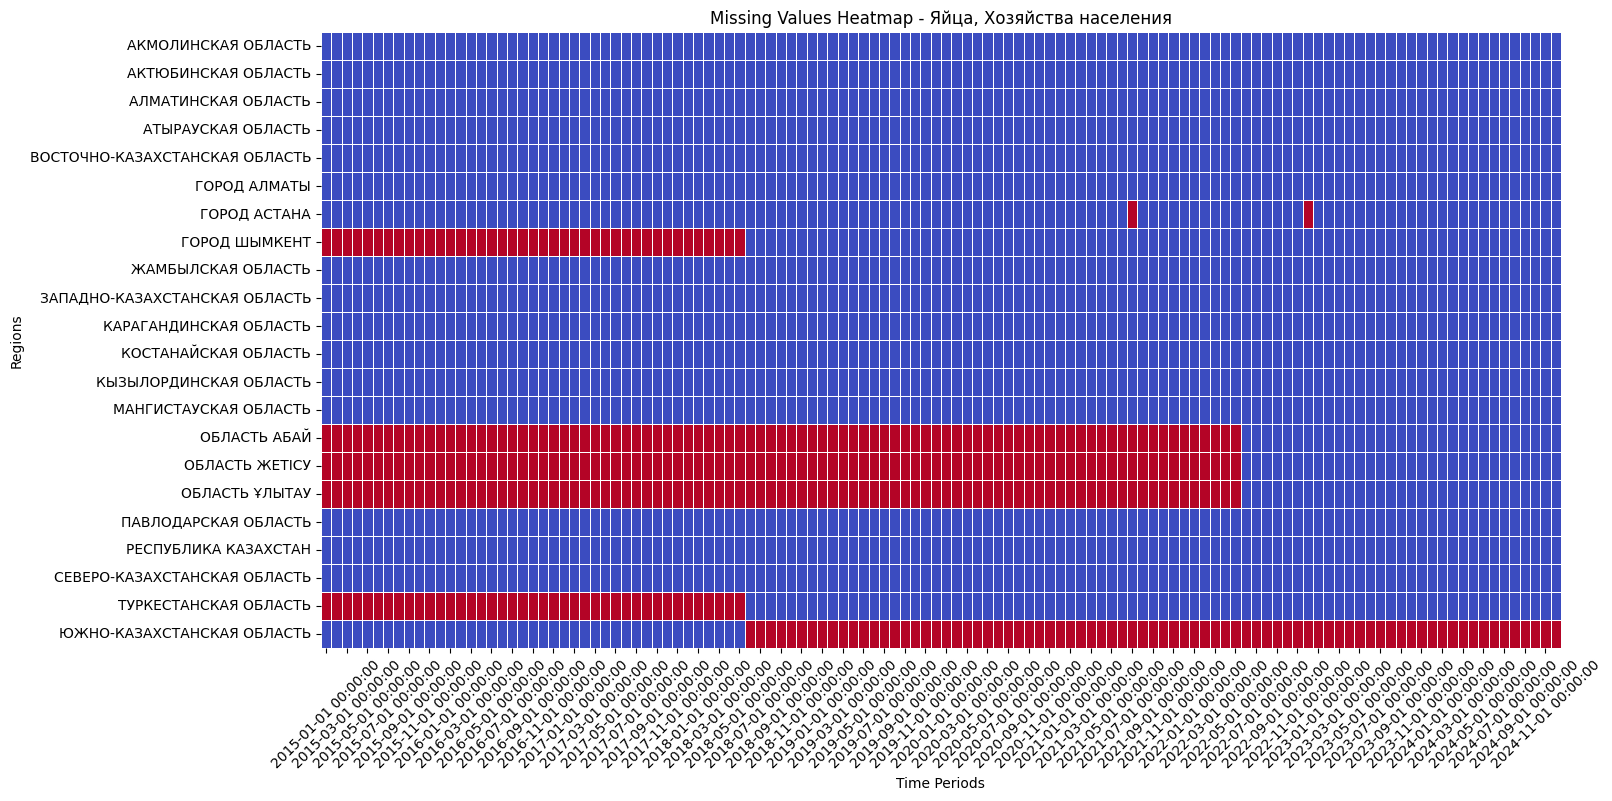

In [21]:
# Replace "нетнетнет" with NaN for easier handling
df_hn.replace("нет", np.nan, inplace=True)

# Convert all values to numeric, keeping NaNs
df_hn_numeric = df_hn.set_index("Регион").apply(pd.to_numeric, errors="coerce")

# Create heatmap: 1 for missing values, 0 for present values
missing_heatmap = df_hn_numeric.isna()

# Plot heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(missing_heatmap, cmap="coolwarm", cbar=False, linewidths=0.5)
plt.title('Missing Values Heatmap - Яйца, Хозяйства населения')
plt.xlabel("Time Periods")
plt.ylabel("Regions")
plt.xticks(rotation=45)
plt.show()

In [22]:
df_sum_melted

Объем
Регион                     Месяц              
АКМОЛИНСКАЯ ОБЛАСТЬ        2015-01-01  51667.7
                           2015-02-01  49357.2
                           2015-03-01  59105.8
                           2015-04-01  61953.7
                           2015-05-01  72700.2
...                                        ...
ЮЖНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ 2024-08-01      NaN
                           2024-09-01      NaN
                           2024-10-01      NaN
                           2024-11-01      NaN
                           2024-12-01      NaN

[2640 rows x 1 columns]

In [23]:
# Reset index if needed
df_stats = df_sum_melted.reset_index()

# Calculate basic descriptive stats for each region
region_stats = df_stats.groupby("Регион")["Объем"].agg([
    "count", "min", "max", "mean", "median", "std"
]).rename(columns={
    "count": "Кол-во значений",
    "min": "Мин.",
    "max": "Макс.",
    "mean": "Среднее",
    "median": "Медиана",
    "std": "Ст. откл."
})

# Display result
display(region_stats.sort_values(by="Среднее", ascending=False))


,Кол-во значений,Мин.,Макс.,Среднее,Медиана,Ст. откл.
Регион,,,,,,
РЕСПУБЛИКА КАЗАХСТАН,120,301140.1,519638.8,412009.790000,404484.65,51504.707123
АЛМАТИНСКАЯ ОБЛАСТЬ,120,33580.7,104382.4,74555.751667,82267.10,20619.346577
АКМОЛИНСКАЯ ОБЛАСТЬ,120,46739.2,87385.6,64699.765000,64418.35,8210.896881
КАРАГАНДИНСКАЯ ОБЛАСТЬ,120,39033.4,67904.4,55230.237500,55025.95,5420.722804
СЕВЕРО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,120,16733.4,92264.6,53947.894167,53310.95,15364.875493
КОСТАНАЙСКАЯ ОБЛАСТЬ,120,25427.0,70301.3,47340.892500,50852.95,11760.188947
ОБЛАСТЬ ЖЕТІСУ,31,25307.6,36425.2,29174.022581,28495.50,3219.291544
ЮЖНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,41,19349.7,34640.4,26575.687805,26540.20,3703.481844
ТУРКЕСТАНСКАЯ ОБЛАСТЬ,79,11514.9,25548.4,18921.962025,19106.30,3487.891104


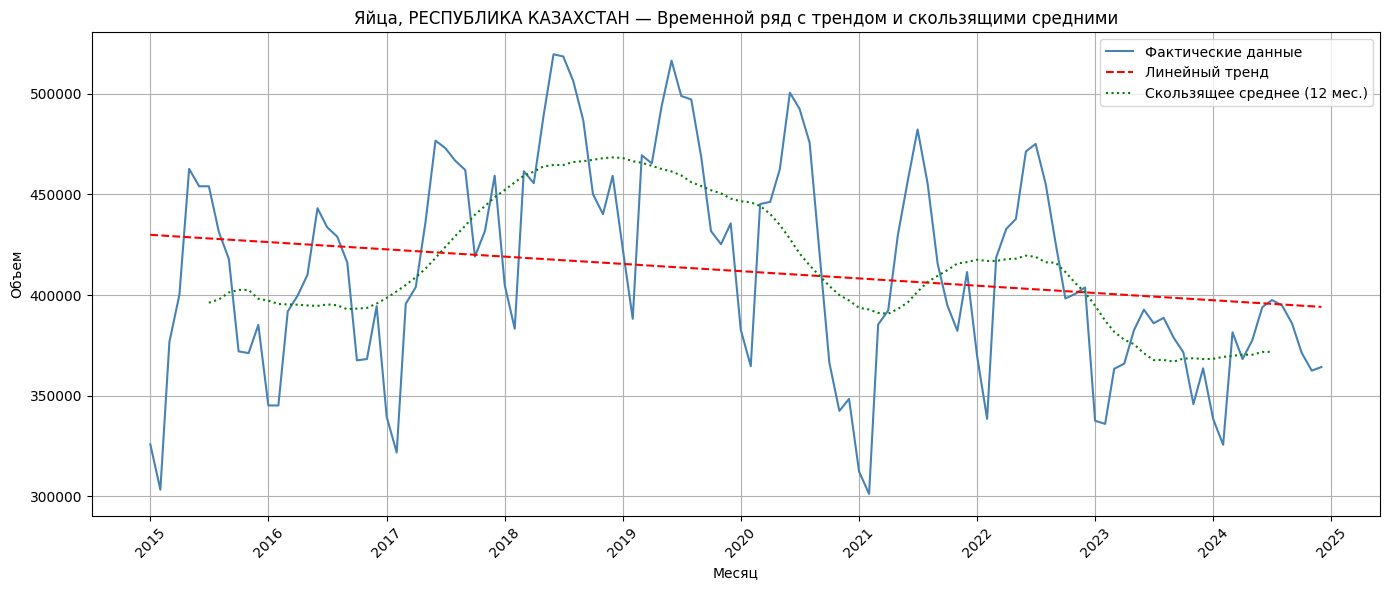

In [24]:
# Filter for national level
national_data = df_stats[df_stats["Регион"] == "РЕСПУБЛИКА КАЗАХСТАН"].copy()

# Ensure 'Месяц' is datetime
national_data["Месяц"] = pd.to_datetime(national_data["Месяц"])

# Create time index as integer (months since start)
national_data = national_data.sort_values("Месяц")
national_data["t"] = range(len(national_data))  # 0, 1, 2, ..., N

# Trend line
coeffs = np.polyfit(national_data["t"], national_data["Объем"], deg=1)
trend = np.poly1d(coeffs)

# Moving Averages
national_data["MA_12"] = national_data["Объем"].rolling(window=12, center=True).mean()

# Plot
plt.figure(figsize=(14, 6))

# Actual data
plt.plot(national_data["Месяц"], national_data["Объем"], label="Фактические данные", color="steelblue")

# Trend line
plt.plot(national_data["Месяц"], trend(national_data["t"]), linestyle="--", color="red", label="Линейный тренд")

# Moving Averages
plt.plot(national_data["Месяц"], national_data["MA_12"], linestyle=":", color="green", label="Скользящее среднее (12 мес.)")

# Labels and style
plt.title("Яйца, РЕСПУБЛИКА КАЗАХСТАН — Временной ряд с трендом и скользящими средними")
plt.xlabel("Месяц")
plt.ylabel("Объем")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

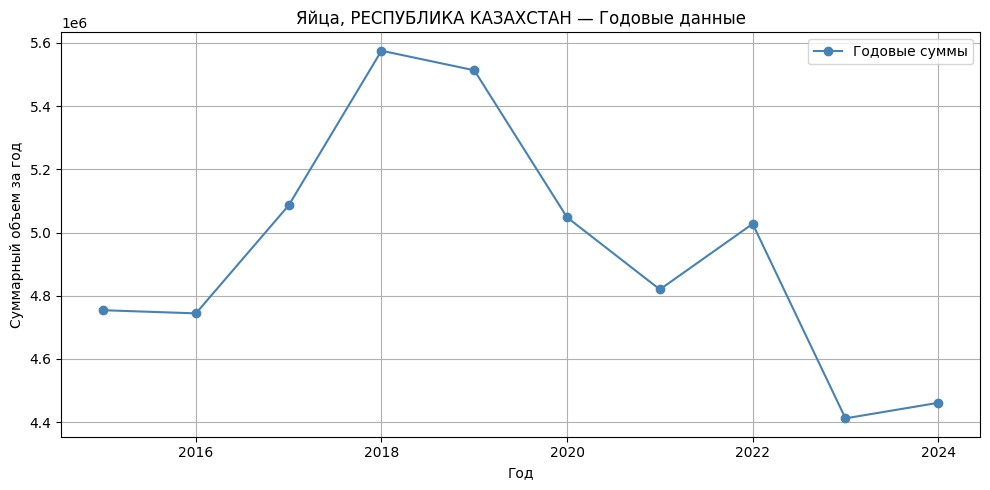

In [25]:
# Aggregate by year (sum)
national_data["Год"] = national_data["Месяц"].dt.year
annual_data = national_data.groupby("Год")["Объем"].sum().reset_index()

# Plot
plt.figure(figsize=(10, 5))

# Actual yearly data
plt.plot(annual_data["Год"], annual_data["Объем"], marker='o', label="Годовые суммы", color="steelblue")

# Labels and style
plt.title("Яйца, РЕСПУБЛИКА КАЗАХСТАН — Годовые данные")
plt.xlabel("Год")
plt.ylabel("Суммарный объем за год")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [92]:
# # Filter for national level
# aktobe_data = df_stats[df_stats["Регион"] == "АКТЮБИНСКАЯ ОБЛАСТЬ"].copy()

# # Ensure 'Месяц' is datetime
# aktobe_data["Месяц"] = pd.to_datetime(aktobe_data["Месяц"])

# # Create time index as integer (months since start)
# aktobe_data = aktobe_data.sort_values("Месяц")
# aktobe_data["t"] = range(len(aktobe_data))  # 0, 1, 2, ..., N

# # Trend line
# coeffs = np.polyfit(aktobe_data["t"], aktobe_data["Объем"], deg=1)
# trend = np.poly1d(coeffs)

# # Moving Averages
# aktobe_data["MA_12"] = aktobe_data["Объем"].rolling(window=12, center=True).mean()

# # Plot
# plt.figure(figsize=(14, 6))

# # Actual data
# plt.plot(aktobe_data["Месяц"], aktobe_data["Объем"], label="Фактические данные", color="steelblue")

# # Trend line
# plt.plot(aktobe_data["Месяц"], trend(aktobe_data["t"]), linestyle="--", color="red", label="Линейный тренд")

# # Moving Averages
# plt.plot(aktobe_data["Месяц"], aktobe_data["MA_12"], linestyle=":", color="green", label="Скользящее среднее (12 мес.)")

# # Labels and style
# plt.title("АКТЮБИНСКАЯ ОБЛАСТЬ — Временной ряд с трендом и скользящими средними")
# plt.xlabel("Месяц")
# plt.ylabel("Объем")
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()

In [93]:
# # Filter for national level
# akmola_data = df_stats[df_stats["Регион"] == "АКМОЛИНСКАЯ ОБЛАСТЬ"].copy()

# # Ensure 'Месяц' is datetime
# akmola_data["Месяц"] = pd.to_datetime(akmola_data["Месяц"])

# # Create time index as integer (months since start)
# akmola_data = akmola_data.sort_values("Месяц")
# akmola_data["t"] = range(len(akmola_data))  # 0, 1, 2, ..., N

# # Trend line
# coeffs = np.polyfit(akmola_data["t"], akmola_data["Объем"], deg=1)
# trend = np.poly1d(coeffs)

# # Moving Averages
# akmola_data["MA_12"] = akmola_data["Объем"].rolling(window=12, center=True).mean()

# # Plot
# plt.figure(figsize=(14, 6))

# # Actual data
# plt.plot(akmola_data["Месяц"], akmola_data["Объем"], label="Фактические данные", color="steelblue")

# # Trend line
# plt.plot(akmola_data["Месяц"], trend(akmola_data["t"]), linestyle="--", color="red", label="Линейный тренд")

# # Moving Averages
# plt.plot(akmola_data["Месяц"], akmola_data["MA_12"], linestyle=":", color="green", label="Скользящее среднее (12 мес.)")

# # Labels and style
# plt.title("АКМОЛИНСКАЯ ОБЛАСТЬ — Временной ряд с трендом и скользящими средними")
# plt.xlabel("Месяц")
# plt.ylabel("Объем")
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()

In [94]:
# # Filter for national level
# kyzylorda_data = df_stats[df_stats["Регион"] == "КЫЗЫЛОРДИНСКАЯ ОБЛАСТЬ"].copy()

# # Ensure 'Месяц' is datetime
# kyzylorda_data["Месяц"] = pd.to_datetime(kyzylorda_data["Месяц"])

# # Create time index as integer (months since start)
# kyzylorda_data = kyzylorda_data.sort_values("Месяц")
# kyzylorda_data["t"] = range(len(kyzylorda_data))  # 0, 1, 2, ..., N

# # Trend line
# coeffs = np.polyfit(kyzylorda_data["t"], kyzylorda_data["Объем"], deg=1)
# trend = np.poly1d(coeffs)

# # Moving Averages
# kyzylorda_data["MA_12"] = kyzylorda_data["Объем"].rolling(window=12, center=True).mean()

# # Plot
# plt.figure(figsize=(14, 6))

# # Actual data
# plt.plot(kyzylorda_data["Месяц"], kyzylorda_data["Объем"], label="Фактические данные", color="steelblue")

# # Trend line
# plt.plot(kyzylorda_data["Месяц"], trend(kyzylorda_data["t"]), linestyle="--", color="red", label="Линейный тренд")

# # Moving Averages
# plt.plot(kyzylorda_data["Месяц"], kyzylorda_data["MA_12"], linestyle=":", color="green", label="Скользящее среднее (12 мес.)")

# # Labels and style
# plt.title("КЫЗЫЛОРДИНСКАЯ ОБЛАСТЬ — Временной ряд с трендом и скользящими средними")
# plt.xlabel("Месяц")
# plt.ylabel("Объем")
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()